In [1]:
%matplotlib notebook

In [2]:
import warnings
warnings.simplefilter('ignore')

import json
import pandas as pd
import pprint
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [3]:
with open('data/travis_af1_white.json') as f:
    org = json.load(f)

    print(json.dumps(org, indent=4))
    travis_white = pd.DataFrame(org["ProductActivity"])

{
    "ProductActivity": [
        {
            "chainId": "12900842399484877343",
            "amount": 793,
            "createdAt": "2019-07-11T10:20:14+00:00",
            "shoeSize": "10.5",
            "productId": null,
            "skuUuid": "4511156f-da32-4100-8091-ac29d0ab23e3",
            "state": "480",
            "customerId": null,
            "localAmount": 793,
            "localCurrency": "USD"
        },
        {
            "chainId": "12694972984696731106",
            "amount": 601,
            "createdAt": "2019-07-11T00:35:33+00:00",
            "shoeSize": "11",
            "productId": null,
            "skuUuid": "83758a92-89e9-4082-8faf-f37c759d01b9",
            "state": "480",
            "customerId": null,
            "localAmount": 601,
            "localCurrency": "USD"
        },
        {
            "chainId": "13108010517028332525",
            "amount": 800,
            "createdAt": "2019-07-10T04:23:48+00:00",
            "shoeSize": "8.5",
  

In [4]:
travis_white_data =  travis_white.rename(index=str, columns={"amount": "price", "createdAt": "purchase_date", "skuUuid": "sku", "shoeSize": "shoe_size"})
travis_white_data.head()

price               chainId              purchase_date customerId  \
0  793.0000  12900842399484877343  2019-07-11T10:20:14+00:00       None   
1  601.0000  12694972984696731106  2019-07-11T00:35:33+00:00       None   
2  800.0000  13108010517028332525  2019-07-10T04:23:48+00:00       None   
3  981.1377  13100093166323727726  2019-07-09T18:48:10+00:00       None   
4  642.0000  13106524132335056402  2019-07-06T14:39:14+00:00       None   

   localAmount localCurrency productId shoe_size  \
0          793           USD      None      10.5   
1          601           USD      None        11   
2          800           USD      None       8.5   
3          982           USD      None       9.5   
4          642           USD      None       7.5   

                                    sku state  
0  4511156f-da32-4100-8091-ac29d0ab23e3   480  
1  83758a92-89e9-4082-8faf-f37c759d01b9   480  
2  e56b6c69-d462-4e42-9f54-5f8815757201   480  
3  0ac6b67f-9f89-424a-8be2-fa09454dd9ff   480  
4  6892af85-c776-4a85-9169-f1a92e0cf4b9   480

In [5]:
travis_white_data =  travis_white_data.rename(index=str, columns={"amount": "price", "createdAt": "purchase_date", "skuUuid": "sku", "shoeSize": "shoe_size"})

In [6]:
new_travis_white_data = travis_white_data[['price', 'purchase_date', 'shoe_size']]
new_travis_white_data.head()

price              purchase_date shoe_size
0  793.0000  2019-07-11T10:20:14+00:00      10.5
1  601.0000  2019-07-11T00:35:33+00:00        11
2  800.0000  2019-07-10T04:23:48+00:00       8.5
3  981.1377  2019-07-09T18:48:10+00:00       9.5
4  642.0000  2019-07-06T14:39:14+00:00       7.5

In [7]:
size9_travis_white = new_travis_white_data.loc[new_travis_white_data["shoe_size"] == "9", : ]
size9_travis_white.head()

price              purchase_date shoe_size
27  830.0000  2019-05-27T05:50:45+00:00         9
29  820.0000  2019-05-26T16:15:20+00:00         9
31  824.2554  2019-05-23T18:14:49+00:00         9
33  666.0000  2019-05-20T02:11:53+00:00         9
54  850.9541  2019-05-04T11:53:42+00:00         9

In [8]:
newsize9 = size9_travis_white["purchase_date"].str.replace(r"00:00", " ")
newsize9.head()

27    2019-05-27T05:50:45+ 
29    2019-05-26T16:15:20+ 
31    2019-05-23T18:14:49+ 
33    2019-05-20T02:11:53+ 
54    2019-05-04T11:53:42+ 
Name: purchase_date, dtype: object

In [9]:
new2size9 = newsize9.str.replace(r"+", " ")
new2size9.head()

27    2019-05-27T05:50:45  
29    2019-05-26T16:15:20  
31    2019-05-23T18:14:49  
33    2019-05-20T02:11:53  
54    2019-05-04T11:53:42  
Name: purchase_date, dtype: object

In [10]:
new3size9 = new2size9.str.replace(r"T", " ")
new3size9.head()

27    2019-05-27 05:50:45  
29    2019-05-26 16:15:20  
31    2019-05-23 18:14:49  
33    2019-05-20 02:11:53  
54    2019-05-04 11:53:42  
Name: purchase_date, dtype: object

In [11]:
new3size9
new3size_new=[i.split()[0] for i in new3size9]
new3size_new
# for i in new3size9:
#     print(i.split()[0])
# new4size9

['2019-05-27',
 '2019-05-26',
 '2019-05-23',
 '2019-05-20',
 '2019-05-04',
 '2019-05-03',
 '2019-04-09',
 '2019-04-05',
 '2019-03-30',
 '2019-03-20',
 '2019-03-03',
 '2019-01-03',
 '2019-01-01',
 '2018-12-27',
 '2018-11-30',
 '2018-11-22',
 '2018-11-20',
 '2018-11-01',
 '2018-10-22',
 '2018-10-13',
 '2018-10-11',
 '2018-10-07',
 '2018-10-07',
 '2018-09-26',
 '2018-09-13',
 '2018-09-07',
 '2018-08-28',
 '2018-08-26',
 '2018-08-18',
 '2018-08-15',
 '2018-08-15',
 '2018-08-10',
 '2018-08-07',
 '2018-08-03',
 '2018-07-26',
 '2018-07-23',
 '2018-07-21',
 '2018-07-21',
 '2018-07-20',
 '2018-07-12',
 '2018-07-04',
 '2018-07-02',
 '2018-07-02',
 '2018-06-25',
 '2018-06-22',
 '2018-06-12',
 '2018-06-08',
 '2018-05-31',
 '2018-05-22',
 '2018-05-14',
 '2018-04-21',
 '2018-04-19',
 '2018-04-09',
 '2018-03-24',
 '2018-03-18',
 '2018-03-15',
 '2018-03-13',
 '2018-03-09',
 '2018-03-04',
 '2018-03-03',
 '2018-03-02',
 '2018-02-24',
 '2018-02-17',
 '2018-02-17',
 '2018-02-13',
 '2018-02-05',
 '2018-02-

In [12]:
size9sum = pd.DataFrame({"Price": size9_travis_white["price"],"Purchase_date": new3size_new, "Shoe_size": size9_travis_white["shoe_size"]})
size9sum.head()

Price Purchase_date Shoe_size
27  830.0000    2019-05-27         9
29  820.0000    2019-05-26         9
31  824.2554    2019-05-23         9
33  666.0000    2019-05-20         9
54  850.9541    2019-05-04         9

In [13]:
size9sum["Purchase_date"] = pd.to_datetime(size9sum["Purchase_date"]).dt.strftime("%Y%m%d")
size9sum.head()

Price Purchase_date Shoe_size
27  830.0000      20190527         9
29  820.0000      20190526         9
31  824.2554      20190523         9
33  666.0000      20190520         9
54  850.9541      20190504         9

In [14]:
#making it into a list and cutting it
purchase = list(size9sum["Purchase_date"])
X = purchase[::-1]

price = list(size9sum["Price"])
Y = price[::-1]


<IPython.core.display.Javascript object>


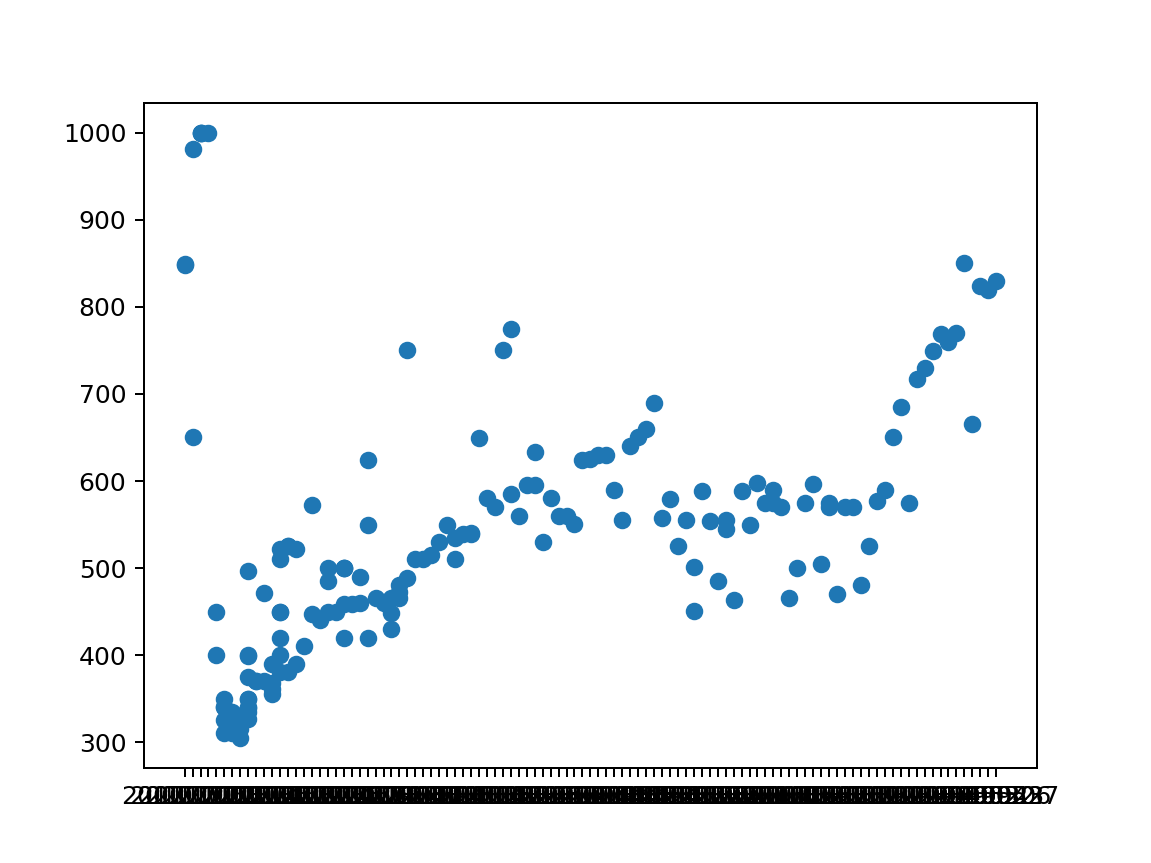

In [15]:
 plt.scatter(X, Y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 150, random_state = 0)
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model

In [17]:
X = np.array(X)
X

array(['20171106', '20171106', '20171111', '20171111', '20171112',
       '20171112', '20171112', '20171118', '20171130', '20171130',
       '20171202', '20171202', '20171202', '20171202', '20171202',
       '20171203', '20171203', '20171203', '20171203', '20171203',
       '20171203', '20171204', '20171204', '20171204', '20171204',
       '20171204', '20171204', '20171205', '20171205', '20171205',
       '20171205', '20171205', '20171205', '20171205', '20171205',
       '20171205', '20171205', '20171206', '20171206', '20171207',
       '20171207', '20171208', '20171208', '20171208', '20171208',
       '20171209', '20171209', '20171209', '20171209', '20171209',
       '20171209', '20171209', '20171210', '20171210', '20171210',
       '20171212', '20171212', '20171213', '20171214', '20171214',
       '20171215', '20171216', '20171216', '20171216', '20171217',
       '20171218', '20171218', '20171218', '20171218', '20171218',
       '20171219', '20171220', '20171220', '20171222', '201712

In [18]:
X = X.reshape(-1,1)

X

array([['20171106'],
       ['20171106'],
       ['20171111'],
       ['20171111'],
       ['20171112'],
       ['20171112'],
       ['20171112'],
       ['20171118'],
       ['20171130'],
       ['20171130'],
       ['20171202'],
       ['20171202'],
       ['20171202'],
       ['20171202'],
       ['20171202'],
       ['20171203'],
       ['20171203'],
       ['20171203'],
       ['20171203'],
       ['20171203'],
       ['20171203'],
       ['20171204'],
       ['20171204'],
       ['20171204'],
       ['20171204'],
       ['20171204'],
       ['20171204'],
       ['20171205'],
       ['20171205'],
       ['20171205'],
       ['20171205'],
       ['20171205'],
       ['20171205'],
       ['20171205'],
       ['20171205'],
       ['20171205'],
       ['20171205'],
       ['20171206'],
       ['20171206'],
       ['20171207'],
       ['20171207'],
       ['20171208'],
       ['20171208'],
       ['20171208'],
       ['20171208'],
       ['20171209'],
       ['20171209'],
       ['2017

In [19]:
X_train = np.array(X_train)
X_test = np.array(X_test)

# X_train
X_test

array(['20181120', '20171212', '20180622', '20171215', '20180203',
       '20171209', '20171118', '20171112', '20180102', '20180807',
       '20171210', '20180115', '20190303', '20180203', '20171222',
       '20171209', '20171222', '20180122', '20180818', '20180117',
       '20180302', '20180224', '20181101', '20190526', '20171212',
       '20181122', '20171204', '20180913', '20190101', '20171205',
       '20171130', '20180303', '20180612', '20171206', '20171216',
       '20171208', '20171204', '20171216', '20180110', '20171203',
       '20180721', '20181022', '20180815', '20171203', '20171218',
       '20180810', '20171207', '20190330', '20171204', '20171220',
       '20180115', '20180608', '20180217', '20180304', '20171205',
       '20180111', '20180720', '20180114', '20180315', '20180318',
       '20171203', '20180522', '20190523', '20171205', '20171227',
       '20171216', '20171111', '20171214', '20180313', '20180113',
       '20171208', '20171202', '20171226', '20190503', '201807

In [20]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

X_test 

array([['20181120'],
       ['20171212'],
       ['20180622'],
       ['20171215'],
       ['20180203'],
       ['20171209'],
       ['20171118'],
       ['20171112'],
       ['20180102'],
       ['20180807'],
       ['20171210'],
       ['20180115'],
       ['20190303'],
       ['20180203'],
       ['20171222'],
       ['20171209'],
       ['20171222'],
       ['20180122'],
       ['20180818'],
       ['20180117'],
       ['20180302'],
       ['20180224'],
       ['20181101'],
       ['20190526'],
       ['20171212'],
       ['20181122'],
       ['20171204'],
       ['20180913'],
       ['20190101'],
       ['20171205'],
       ['20171130'],
       ['20180303'],
       ['20180612'],
       ['20171206'],
       ['20171216'],
       ['20171208'],
       ['20171204'],
       ['20171216'],
       ['20180110'],
       ['20171203'],
       ['20180721'],
       ['20181022'],
       ['20180815'],
       ['20171203'],
       ['20171218'],
       ['20180810'],
       ['20171207'],
       ['2019

In [21]:
X_test = X_test.astype(float)

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
y_pred = regressor.predict(X_test)
y_pred

array([580.54401396, 430.40710033, 572.99777021, 430.45255963,
       566.64862136, 430.36164103, 428.98270894, 428.89179034,
       565.11815828, 575.80109369, 430.37679413, 565.31514857,
       719.69493017, 566.64862136, 430.55863133, 430.36164103,
       430.55863133, 565.42122027, 575.96777779, 565.34545477,
       568.14877825, 566.96683646, 580.25610506, 723.07407144,
       430.40710033, 580.57432016, 430.28587553, 577.40732228,
       716.63400399, 430.30102863, 429.16454614, 568.16393135,
       572.84623922, 430.31618173, 430.46771273, 430.34648793,
       430.28587553, 430.46771273, 565.23938308, 430.27072243,
       574.4979271 , 579.05901017, 575.92231849, 430.27072243,
       430.49801893, 575.84655299, 430.33133483, 720.10406387,
       430.28587553, 430.52832513, 565.31514857, 572.78562682,
       566.86076476, 568.17908445, 430.30102863, 565.25453618,
       574.482774  , 565.29999548, 568.34576855, 568.39122785,
       430.27072243, 571.48246023, 723.02861214, 430.30

In [24]:
import pickle
pickle.dump(regressor, open('model.pkl','wb'))

In [25]:
model = pickle.load( open('model.pkl','rb'))
print(model.predict([[20200102]]))

[868.18015591]


In [26]:
# X, Y = make_regression(n_samples=20, n_features=1, random_state=0, noise=4, bias=100.0)


In [27]:
# from sklearn.metrics import mean_squared_error, r2_score

# # Use our model to predict a value
# predicted = model.predict(X)

# # Score the prediction with mse and r2
# mse = mean_squared_error(Y, predicted)
# r2 = r2_score(Y, predicted)

# print(f"Mean Squared Error (MSE): {mse}")
# print(f"R-squared (R2 ): {r2}")

In [28]:
# model.fit(X_train, y_train)

In [29]:
# model.score(X_test, y_test)